<a href="https://colab.research.google.com/github/rkassila/learning-dipy/blob/master/quick_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dipy

In [ ]:
!pip install fury

In [23]:
import dipy
import fury

from os.path import expanduser, join

import matplotlib.pyplot as plt

from dipy.core.gradients import gradient_table
from dipy.data import fetch_sherbrooke_3shell
from dipy.io import read_bvals_bvecs
from dipy.io.image import load_nifti, save_nifti

In [24]:
fetch_sherbrooke_3shell()

  0%|          | 0/11750 [00:00<?, ? MB/s]

  0%|          | 0/1 [00:00<?, ? MB/s]

  0%|          | 0/1 [00:00<?, ? MB/s]

({'HARDI193.nii.gz': ('https://digital.lib.washington.edu/researchworks/bitstream/handle/1773/38475/HARDI193.nii.gz',
   '0b735e8f16695a37bfbd66aab136eb66'),
  'HARDI193.bval': ('https://digital.lib.washington.edu/researchworks/bitstream/handle/1773/38475/HARDI193.bval',
   'e9b9bb56252503ea49d31fb30a0ac637'),
  'HARDI193.bvec': ('https://digital.lib.washington.edu/researchworks/bitstream/handle/1773/38475/HARDI193.bvec',
   '0c83f7e8b917cd677ad58a078658ebb7')},
 '/root/.dipy/sherbrooke_3shell')

In [26]:
home = expanduser('~')

In [27]:
dname = join(home, '.dipy', 'sherbrooke_3shell')

In [28]:
fdwi = join(dname, 'HARDI193.nii.gz')

print(fdwi)

fbval = join(dname, 'HARDI193.bval')

print(fbval)

fbvec = join(dname, 'HARDI193.bvec')

print(fbvec)

/root/.dipy/sherbrooke_3shell/HARDI193.nii.gz
/root/.dipy/sherbrooke_3shell/HARDI193.bval
/root/.dipy/sherbrooke_3shell/HARDI193.bvec


In [29]:
data, affine, img = load_nifti(fdwi, return_img=True)

In [31]:
print(data.shape)
print(img.header.get_zooms()[:3])

(128, 128, 60, 193)
(2.0, 2.0, 2.0)


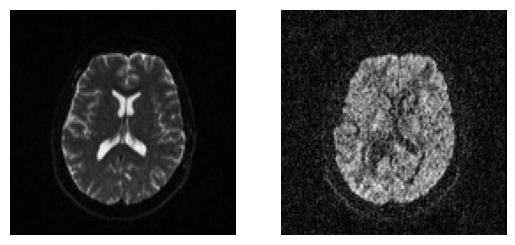

<Figure size 640x480 with 0 Axes>

In [32]:
axial_middle = data.shape[2] // 2
plt.figure('Showing the datasets')
plt.subplot(1, 2, 1).set_axis_off()
plt.imshow(data[:, :, axial_middle, 0].T, cmap='gray', origin='lower')
plt.subplot(1, 2, 2).set_axis_off()
plt.imshow(data[:, :, axial_middle, 10].T, cmap='gray', origin='lower')
plt.show()
plt.savefig('data.png', bbox_inches='tight')

In [33]:
bvals, bvecs = read_bvals_bvecs(fbval, fbvec)

In [34]:
gtab = gradient_table(bvals, bvecs)

In [35]:
print(gtab.info)

B-values shape (193,)
         min 0.000000
         max 3500.000000
B-vectors shape (193, 3)
          min -0.964050
          max 0.999992

None


In [36]:
print(gtab.bvals)

[   0. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 3500. 3500. 3500.
 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500.
 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500.
 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 35

In [37]:
print(gtab.bvecs[:10, :])

[[ 0.          0.          0.        ]
 [ 0.999979   -0.00504001 -0.00402795]
 [ 0.          0.999992   -0.00398794]
 [-0.0257055   0.653861   -0.756178  ]
 [ 0.589518   -0.769236   -0.246462  ]
 [-0.235785   -0.529095   -0.815147  ]
 [-0.893578   -0.263559   -0.363394  ]
 [ 0.79784     0.133726   -0.587851  ]
 [ 0.232937    0.931884   -0.278087  ]
 [ 0.93672     0.144139   -0.31903   ]]


In [38]:
S0s = data[:, :, :, gtab.b0s_mask]
print(S0s.shape)

(128, 128, 60, 1)


In [39]:
save_nifti('HARDI193_S0.nii.gz', S0s, affine)